# DataSet Information:

Data is from the website :

https://archive.ics.uci.edu/ml/datasets/Census+Income

# Objective:

Prediction task is to determine whether a person makes over 50K a year

# Listing of attributes: 

**Income**: >50K, <=50K. 

**age**: continuous. 

**workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
fnlwgt: continuous. 

**education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 

**education-num**: continuous. 

**marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 

**relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 

**race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 

**sex**: Female, Male. 

**capital-gain**: continuous. 

**capital-loss**: continuous. 

**hours-per-week**: continuous.

**native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [125]:
import numpy as np
import pandas as pd

In [126]:
data = pd.read_csv('../Projekt/Census_Income_DataSet_Total.csv', delimiter=', ')

C:\Users\piotr\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [127]:
data.shape

(48842, 15)

In [128]:
data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


** Preprocessing data **

In [129]:
data.rename(columns = {'ď»żage': 'age',
                       'marital-status': 'marital_status', 
                       'capital-gain': 'capital_gain',
                       'capital-loss': 'capital_loss',
                       'hours-per-week': 'hours_per_week',
                       'native-country' : 'native_country'}
                        ,inplace = True) # rename column

data = data.drop(columns='education', axis = 1 ) # delete the education column, becuase the education-num column includes the same information
data = data.drop(columns = 'fnlwgt', axis = 1)  # delete this column

data.Income = data.Income.map ({'<=50K':0, '<=50K.':0 ,'>50K':1, '>50K.':1}) #change Income column on dtypes int64

In [130]:
pd.crosstab(data['workclass'], data['Income'])

Income,0,1
workclass,,
?,2534,265
Federal-gov,871,561
Local-gov,2209,927
Never-worked,10,0
Private,26519,7387
Self-emp-inc,757,938
Self-emp-not-inc,2785,1077
State-gov,1451,530
Without-pay,19,2


In [131]:
data['workclass'].replace(['Self-emp-not-inc', 'Self-emp-inc'], ['Self_employed', 'Self_employed'], inplace = True)
data['workclass'].replace(['Local-gov', 'Federal-gov', 'State-gov'], ['Government', 'Government', 'Government'], inplace = True)                       
data['workclass'].replace(['Never-worked', 'Without-pay'], ['Unemployed', 'Unemployed'], inplace = True) 
data['workclass'].replace('?', 'Other', inplace = True)

In [132]:
pd.crosstab(data['workclass'], data['Income'])

Income,0,1
workclass,,
Government,4531,2018
Other,2534,265
Private,26519,7387
Self_employed,3542,2015
Unemployed,29,2


In [133]:
pd.crosstab(data['marital_status'], data['Income'])

Income,0,1
marital_status,,
Divorced,5962,671
Married-AF-spouse,23,14
Married-civ-spouse,12395,9984
Married-spouse-absent,570,58
Never-married,15384,733
Separated,1431,99
Widowed,1390,128


In [134]:
data['marital_status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 
                               ['Married', 'Married', ], inplace = True)

data['marital_status'].replace(['Divorced', 'Separated', 'Widowed', 'Married-spouse-absent'], 
                               ['Not-Married', 'Not-Married', 'Not-Married', 'Not-Married'], inplace = True)

In [135]:
pd.crosstab(data['marital_status'], data['Income'])

Income,0,1
marital_status,,
Married,12418,9998
Never-married,15384,733
Not-Married,9353,956


In [136]:
pd.crosstab(data['occupation'], data['Income'])

Income,0,1
occupation,,
?,2544,265
Adm-clerical,4843,768
Armed-Forces,10,5
Craft-repair,4729,1383
Exec-managerial,3178,2908
Farming-fishing,1317,173
Handlers-cleaners,1934,138
Machine-op-inspct,2650,372
Other-service,4719,204


In [137]:
data['occupation'].replace('?', 'Other-service', inplace = True)

In [138]:
pd.crosstab(data['occupation'], data['Income'])

Income,0,1
occupation,,
Adm-clerical,4843,768
Armed-Forces,10,5
Craft-repair,4729,1383
Exec-managerial,3178,2908
Farming-fishing,1317,173
Handlers-cleaners,1934,138
Machine-op-inspct,2650,372
Other-service,7263,469
Priv-house-serv,239,3


In [139]:
pd.crosstab(data['relationship'], data['Income'])

Income,0,1
relationship,,
Husband,10870,8846
Not-in-family,11307,1276
Other-relative,1454,52
Own-child,7470,111
Unmarried,4816,309
Wife,1238,1093


In [140]:
pd.crosstab(data['relationship'], data['Income'])

Income,0,1
relationship,,
Husband,10870,8846
Not-in-family,11307,1276
Other-relative,1454,52
Own-child,7470,111
Unmarried,4816,309
Wife,1238,1093


In [141]:
pd.crosstab(data['native_country'], data['Income'])

Income,0,1
native_country,,
?,637,220
Cambodia,19,9
Canada,119,63
China,86,36
Columbia,81,4
Cuba,104,34
Dominican-Republic,98,5
Ecuador,39,6
El-Salvador,144,11


In [142]:
data['native_country'].replace (['Cambodia', 'China', 'Hong', 'India', 'Iran', 'Japan', 'Laos', 'Philippines', 'Taiwan', 'Thailand', 'Vietnam'], 
                                ['Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia'], inplace=True)

data['native_country'].replace (['Canada', 'Outlying-US(Guam-USVI-etc)', 'United-States'],
                                ['North America','North America','North America'], inplace = True)

data['native_country'].replace (['Columbia', 'Ecuador', 'Peru'],
                                ['South America', 'South America', 'South America'], inplace = True)

data['native_country'].replace (['Cuba', 'Dominican-Republic', 'El-Salvador', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Puerto-Rico', 'Trinadad&Tobago'],
                                ['Central America', 'Central America', 'Central America', 'Central America', 'Central America', 'Central America', 'Central America', 'Central America', 'Central America', 'Central America', 'Central America'], inplace = True)

data['native_country'].replace(['England', 'France', 'Germany', 'Greece', 'Holand-Netherlands', 'Hungary', 'Ireland', 'Italy', 'Poland', 'Portugal', 'Scotland', 'Yugoslavia'],
                               ['Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe'], inplace = True)

data['native_country'].replace(['South', '?'], 
                               ['Other', 'Other'], inplace = True)

In [143]:
pd.crosstab(data['native_country'], data['Income'])

Income,0,1
native_country,,
Asia,687,294
Central America,1745,151
Europe,550,230
North America,33279,10758
Other,732,240
South America,162,14


In [144]:
data.describe() 

,age,education-num,capital_gain,capital_loss,hours_per_week,Income
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382,0.239282
std,13.710510,2.570973,7452.019058,403.004552,12.391444,0.426649
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [145]:
data.Income.value_counts(normalize=True)

0    0.760718
1    0.239282
Name: Income, dtype: float64

In [146]:
y = data.pop('Income')

In [147]:
data_categorics = data.select_dtypes(include=object)  # only categorics features
data_numerics = data.select_dtypes(include = [np.int64])  # only numerics features 

data_numerics_DF = pd.DataFrame(data=data_numerics, columns=data_numerics.columns, index=data_numerics.index)

categorical_dummies = pd.get_dummies(data_categorics)

X  = pd.concat([data_numerics_DF, categorical_dummies], axis=1)  # new dataframe

In [148]:
X.head()

,age,education-num,capital_gain,capital_loss,hours_per_week,workclass_Government,workclass_Other,workclass_Private,workclass_Self_employed,workclass_Unemployed,...,race_Other,race_White,sex_Female,sex_Male,native_country_Asia,native_country_Central America,native_country_Europe,native_country_North America,native_country_Other,native_country_South America
0,39,13,2174,0,40,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0
2,38,9,0,0,40,0,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
4,28,13,0,0,40,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


** Split dataset **

In [149]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.3, random_state = 123)

In [150]:
X_train.shape, X_test.shape

((34189, 46), (14653, 46))

**Logistic Regression, Naive Bayes, Decision Tree and Random Forest**

In [151]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [152]:
models = [[("standarization", StandardScaler(with_mean=False)),("model", LogisticRegression())],
          [("model", MultinomialNB())],
          [('model', DecisionTreeClassifier())],
          [("model", RandomForestClassifier())]]

param_grids = [{'model__penalty': ['l1', 'l2'], 'model__C': [1, 0.1]},
               {},
               {'model__max_depth': [3, 5, 7, 10], 'model__min_samples_leaf': [5, 10, 15]},
               {"model__n_estimators": [10, 50, 70, 100], "model__min_samples_leaf": [5, 10, 15]}]

In [153]:
results = {}

for pipe, params in zip(models,param_grids):
    
    pipeline = Pipeline(pipe)     
   
    gs = GridSearchCV(estimator=pipeline, param_grid=params, cv=10, n_jobs=-1)
    gs.fit(X_train,y_train)
    
    result = accuracy_score(gs.best_estimator_.predict(X_test), y_test)
    results.update({gs.best_estimator_:result})    

** Accuracy score of the best model **

In [154]:
results_list = []
results_list.append (results)
df = pd.DataFrame(data=results_list).T
df.columns=['accuracy_score']

In [155]:
df.accuracy_score.argmax()

C:\Users\piotr\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


Pipeline(memory=None,
     steps=[('model', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [156]:
print ('Accuracy score ' , df.accuracy_score.max())

Accuracy score  0.8656247867330922


**Classification report**

In [157]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

print (classification_report(y_pred=gs.best_estimator_.predict(X_test), y_true=y_test)) 

             precision    recall  f1-score   support

          0       0.88      0.95      0.92     11166
          1       0.79      0.59      0.68      3487

avg / total       0.86      0.87      0.86     14653



**ROC CURVE**

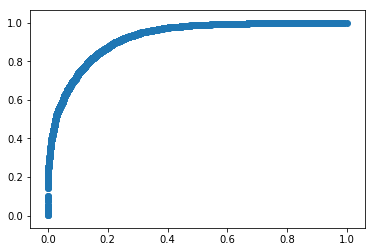

In [158]:
from sklearn.metrics import roc_curve
probability = gs.best_estimator_.predict_proba (X_test)[:,1]
roc_results = roc_curve(y_true=y_test, y_score=probability)
fpr, tpr, _ = roc_results

from matplotlib import pyplot as plt
plt.scatter (fpr, tpr)
plt.show()

**ROC AUC SCORE**

In [159]:
from sklearn.metrics import roc_auc_score

np.round(roc_auc_score(y_score=gs.best_estimator_.predict(X_test), y_true=y_test),2)

0.77

**Checking the feature_importances for the best model **

In [160]:
gs.best_params_

{'model__min_samples_leaf': 5, 'model__n_estimators': 50}

In [161]:
rf = RandomForestClassifier(n_estimators=gs.best_params_['model__n_estimators'], 
                            min_samples_leaf=gs.best_params_['model__min_samples_leaf'])
rf.fit(X_train , y_train)

pd.DataFrame (rf.feature_importances_, index = X_train.columns, 
              columns = ['importance']).sort_values('importance',ascending=False)

,importance
capital_gain,0.184316
education-num,0.138963
marital_status_Married,0.115847
age,0.091421
relationship_Husband,0.072732
marital_status_Never-married,0.057212
hours_per_week,0.051170
capital_loss,0.045003
occupation_Exec-managerial,0.032021
occupation_Prof-specialty,0.025894


In [162]:
rf = gs.best_estimator_
rf.fit(X_train , y_train)
pd.DataFrame ({'feature': X_train.columns, 'importance':rf.feature_importances})

AttributeError: 'Pipeline' object has no attribute 'feature_importances'

# Conclusion

The interesing outcome of this analysis is that the greatest impact on Income have 
capital_gain, education_num, marital_status_Married-civ-spouse and relationship_Husband.
The important variables are age (also age squared) and working hours per wek.
Sex and race are not very siginficant and they have less impact on Income

Random Forest models gave better results than Logistic Regression, Naive Bayes and Decision Tree. 
The Random Forest was calucated on 100 estimators and min samples leaf is 5.
The highest accuracy is equal to 0.86, precision 0.80, recall 0.59 and AUC 0.77.